In [2]:
# importing the required packages required
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [78]:
# reading the dataSet

df=pd.read_csv(r"C:\Users\muthu\OneDrive\Desktop\DataAnalysis\movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [79]:
# checking for missing values in the dataSet
for column in df.columns:
    percent_missing=np.mean(df[column].isnull())
    print('{}-{}%'.format(column,percent_missing))

name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [80]:
#droping all the rows with missing values
df.dropna(inplace=True)

In [81]:
#checking data types of the column
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [82]:
#changing the datype of column from float to int
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')
df['runtime']=df['runtime'].astype('int64')

In [83]:
df['correctYear']=df['released'].astype(str).str.split().str[2]

In [84]:
df.drop_duplicates(inplace=True)

# Correlation between budget and gross

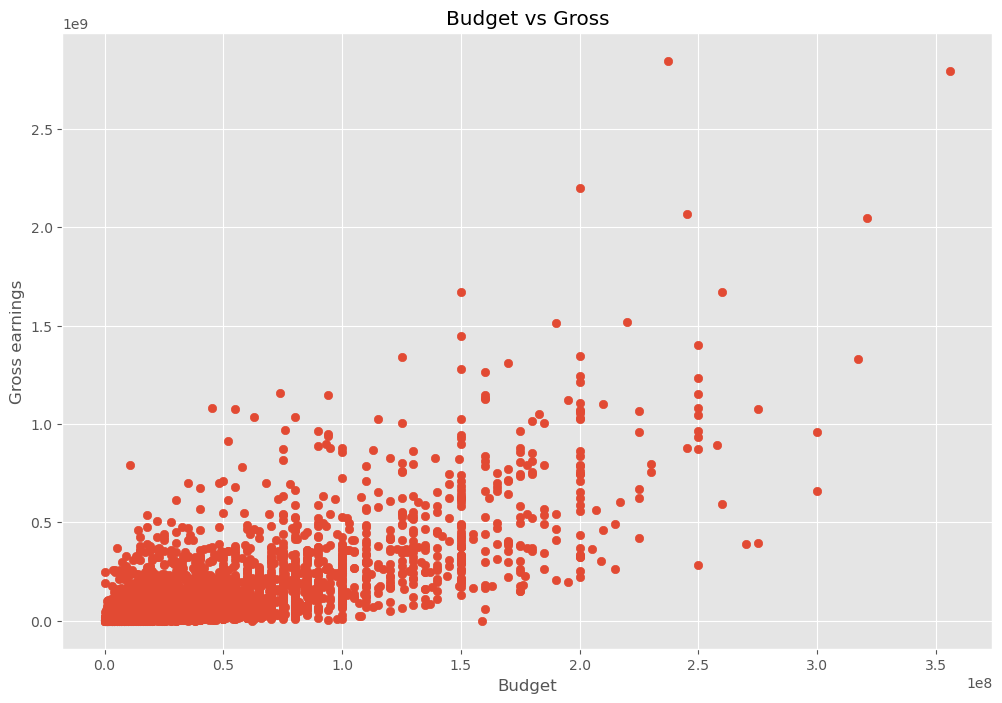

In [66]:
plt.scatter(x=df['budget'],y=df['gross'])
plt.title("Budget vs Gross")
plt.xlabel('Budget')
plt.ylabel('Gross earnings')
plt.show()

Text(0.5, 1.0, 'Budget vs Gross')

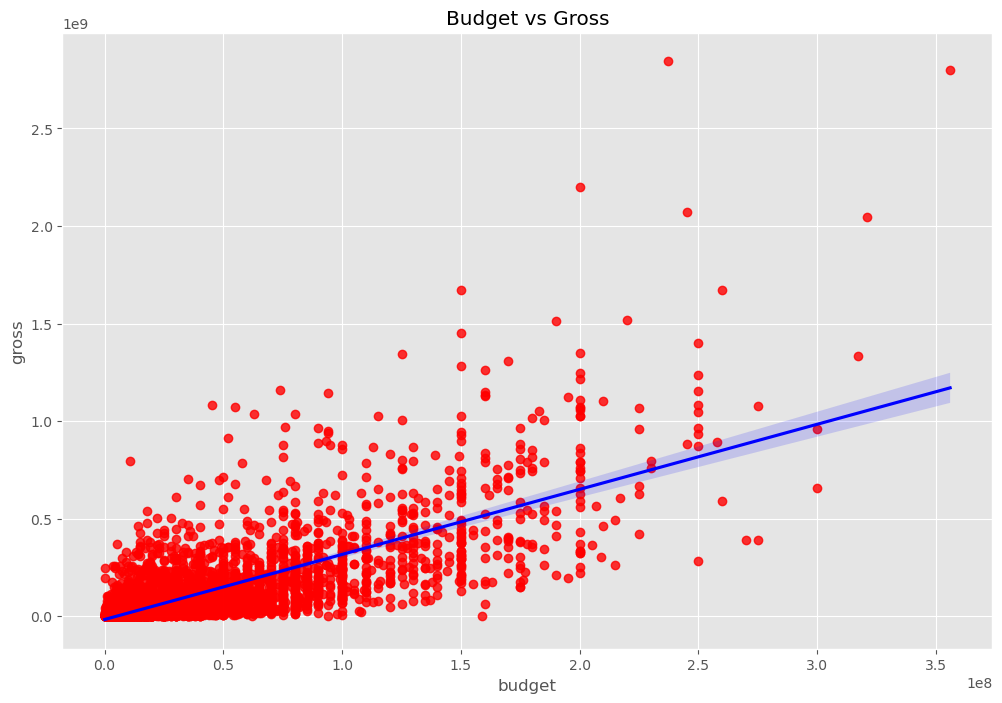

In [43]:
sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":"red"},line_kws={"color":"blue"})
plt.title("Budget vs Gross")

#### Findigs: The Scatterplot above illustrates a positive correlation between budget and movie gross, indicating that as the budget increases, so does the gross revenue of the film.

# Correlation for numeric features

In [45]:
df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


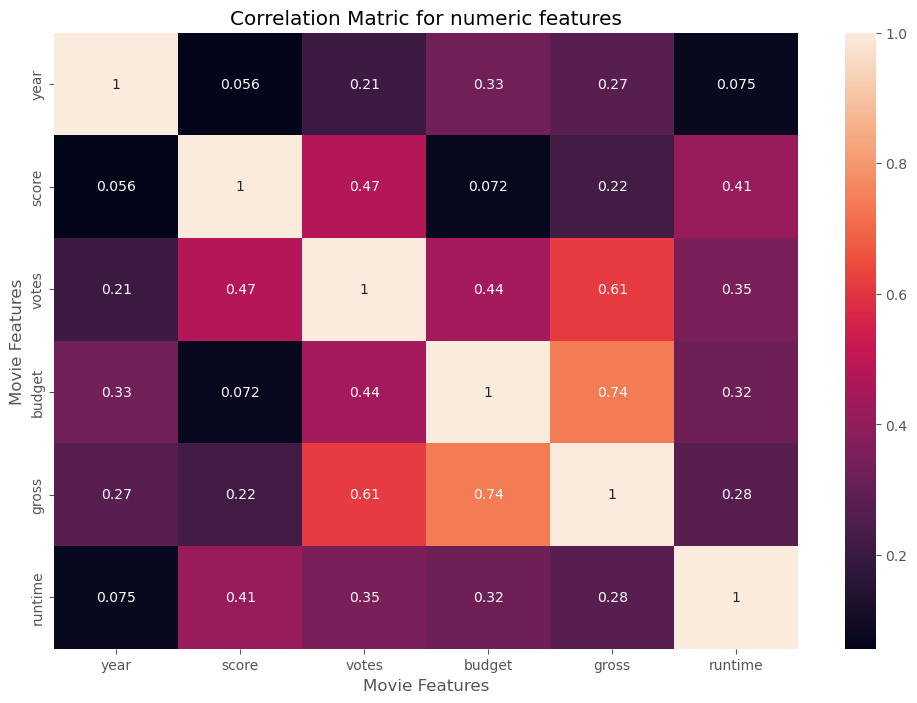

In [52]:
correlation_matrix=df.corr(numeric_only=True)

sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation Matric for numeric features")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [87]:
numeric_df=df
for col in numeric_df:
    if(numeric_df[col].dtype=='object'):
       numeric_df[col]=numeric_df[col].astype('category')
       numeric_df[col]=numeric_df[col].cat.codes     
numeric_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctYear
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146,2
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104,2
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124,2
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88,2
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98,2


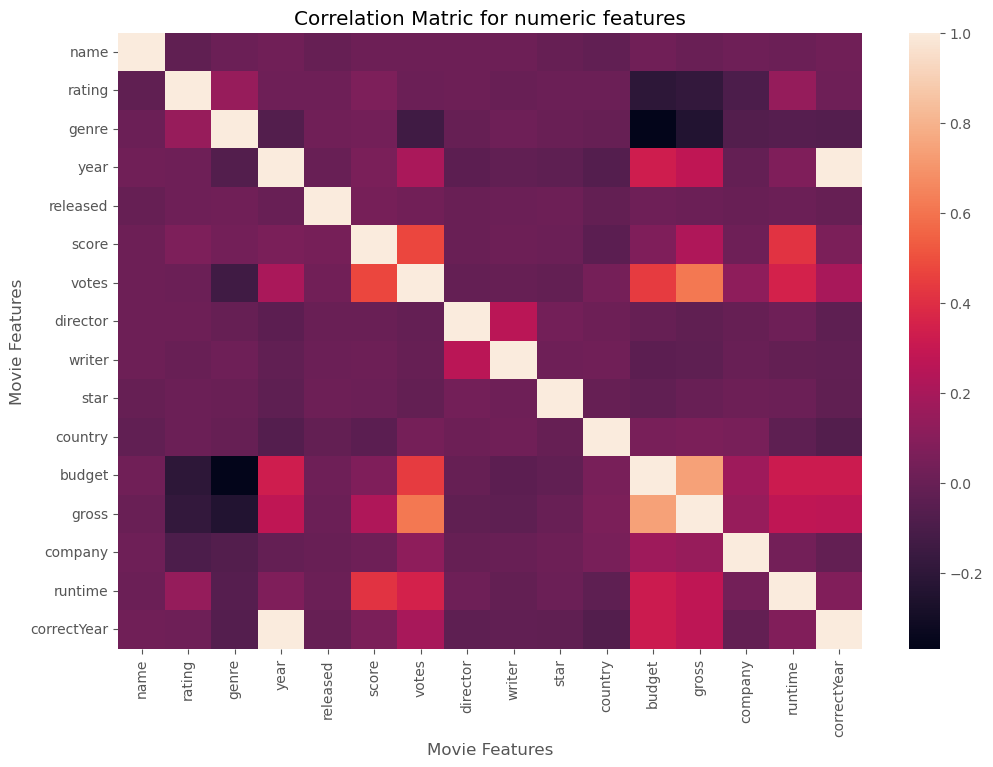

In [65]:
correlation_matrix=numeric_df.corr(numeric_only=True)

sns.heatmap(correlation_matrix)
plt.title("Correlation Matric for numeric features")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

#### Findings: The above heatmaps reveals that, following budget, the most significant correlation with gross revenue is attributed to votes. A higher number of votes is associated with increased movie gross, suggesting a positive relationship between audience engagement and financial success.

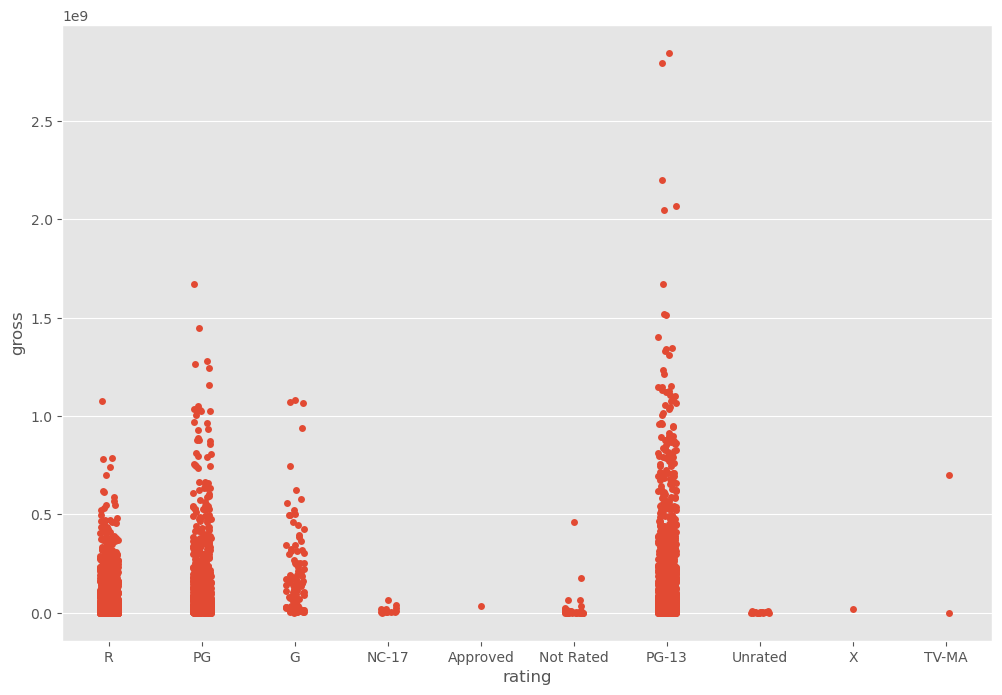

In [69]:
sns.stripplot(x='rating',y='gross',data=df)
plt.show()

# Top 15 companies by gross revnue

In [75]:
CompanyGross= df.groupby('company')[['gross']].sum()
companyGrossSort=CompanyGross.sort_values('gross',ascending=False)[:15]
companyGrossSort=companyGrossSort['gross'].astype('int64')
companyGrossSort

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64